# About the Dataset

This dataset is taken from [Kaggle](https://www.kaggle.com/)

Here is the [link](https://www.kaggle.com/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney)

The data was scraped from Reelgood.com, which comprised a comprehensive list of tv shows available on various streaming platforms

**Data Columns:**
* Title - Title of the tv show or Movie
* Year - Year of release
* Age - Age Group
* IMDb - Ratings
* Rotten Tomatoes - Ratings
* Netflix - Aired on Netflix
* Hulu - Aired on Hulu
* Prime Videp - Aired on Prime Video
* Disney+ - Aired on Disney+
* Type - Movie or TV Show

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import string

In [2]:
# plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams["axes.labelsize"] = 15
plt.rcParams["xtick.labelsize"] = 15
plt.rcParams["ytick.labelsize"] = 15

In [4]:
df = pd.read_csv('Data/tv_shows.csv', index_col=False)
df.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            5611 non-null   object 
 1   Year             5611 non-null   int64  
 2   Age              3165 non-null   object 
 3   IMDb             4450 non-null   float64
 4   Rotten Tomatoes  1011 non-null   object 
 5   Netflix          5611 non-null   int64  
 6   Hulu             5611 non-null   int64  
 7   Prime Video      5611 non-null   int64  
 8   Disney+          5611 non-null   int64  
 9   type             5611 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 438.5+ KB


### Missing Values in Columns:

* Age
* IMDB
* Rotten Tomatoes

In [7]:
df.shape

(5611, 10)

In [8]:
for col in df.columns:
    print("Column: {}".format(col))
    print(df[col].value_counts())
    print('......')

Column: Title
Undercover                      3
Kingdom                         3
Westside                        2
No Activity                     2
Inspector Gadget                2
                               ..
Good Bones                      1
Samurai Champloo                1
Wreck Trek                      1
Tanks aren't afraid of mud      1
Street Fighter: Resurrection    1
Name: Title, Length: 5564, dtype: int64
......
Column: Year
2017    653
2016    573
2018    556
2015    454
2019    396
       ... 
1949      1
1934      1
1931      1
1943      1
1904      1
Name: Year, Length: 81, dtype: int64
......
Column: Age
16+    1018
7+      848
18+     750
all     545
13+       4
Name: Age, dtype: int64
......
Column: IMDb
7.4    211
7.3    201
7.5    199
7.0    186
7.7    184
      ... 
1.0      1
2.0      1
9.6      1
1.7      1
2.1      1
Name: IMDb, Length: 78, dtype: int64
......
Column: Rotten Tomatoes
100%    109
93%      36
89%      31
80%      31
86%      30
       ... 

### Observations:

1. There are multiple "TV shows" - We'll look at them individually.
2. The date range is quite ineterstig - from 1904 - 2017 - We'll a take a look at that as well.
3. I am assuming 'all' and 7+ age will mostly in Disney+ - We will see that.
4. It looks like 'Type' is of no use. It is uniform across the entire dataset.

### Let's begin with exploring the TV shows that have multiple entries

Hypothesis: I am assuming they are multiple seasons of the same TV show

In [9]:
df[df.Title == 'Undercover']

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
540,Undercover,2019,18+,7.9,NaN,1,0,0,0,1
3675,Undercover,2011,7+,8.9,NaN,0,0,1,0,1
4004,Undercover,2016,16+,6.8,75%,0,0,1,0,1


#### Looks like it isn't

In [10]:
df[df.Title == 'Lost in Space']

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
126,Lost in Space,2018,7+,7.3,75%,1,0,0,0,1
2592,Lost in Space,1965,all,7.2,NaN,0,1,0,0,1


#### Okay, so one more and then I'll group and sort to see what's up with these

In [11]:
df[df.Title == 'The Powerpuff Girls']

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
2401,The Powerpuff Girls,1998,7+,7.2,NaN,0,1,0,0,1
3170,The Powerpuff Girls,2016,7+,3.6,NaN,0,1,0,0,1


#### This one is a different version I believe, not a series.
#### So basically this is a mix. 
#### Now let's group by title and get only the records of the count of titles is more than one

In [12]:
duplicate_title_list = list(df.groupby('Title').size().loc[lambda x: x>1].sort_values().reset_index()['Title'])
len(duplicate_title_list)

45

In [13]:
duplicate_title_list[0]

'Abandoned'

In [14]:
df[df.Title.isin(duplicate_title_list)].sort_values(by=['Title'])[20:40]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
870,Danger Mouse,1981,7+,7.4,NaN,1,0,0,0,1
1212,Danger Mouse,2015,all,7.1,NaN,1,0,0,0,1
5459,DuckTales,2017,7+,8.2,100%,0,0,0,1,1
5467,DuckTales,1987,7+,8.1,NaN,0,0,0,1,1
3783,Elizabeth I,2005,18+,7.9,NaN,0,0,1,0,1
4070,Elizabeth I,2017,NaN,7.3,NaN,0,0,1,0,1
1268,Fearless,2016,NaN,7.1,NaN,1,0,0,0,1
3899,Fearless,2017,18+,7.6,NaN,0,0,1,0,1
4892,Frequency,2012,NaN,NaN,NaN,0,0,1,0,1
292,Frequency,2016,7+,7.5,77%,1,0,0,0,1


#### Let me find if I have been watching any - like F.R.I.E.N.D.S or The Vampire Diaries

For that I want to first convert all titles to lower case and remove any punctuation

In [15]:
df['Title Cleaned'] = df.Title.apply(lambda x: x.lower())

In [16]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,Title Cleaned
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1,breaking bad
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1,stranger things
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1,money heist
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1,sherlock
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1,better call saul


In [17]:
len(list(df.groupby('Title Cleaned').size().loc[lambda x: x>1].sort_values().reset_index()['Title Cleaned']))

48

#### Now there is a difference. Let's check the new entry..

In [18]:
titles_list_lower = list(df.groupby('Title Cleaned').size().loc[lambda x: x>1].sort_values().reset_index()['Title Cleaned'])

In [19]:
titles_list = list(df.groupby('Title').size().loc[lambda x: x>1].sort_values().reset_index()['Title'])

In [20]:
titles_list = [each_list.lower() for each_list in titles_list]

In [21]:
len(titles_list), len(titles_list_lower)

(45, 48)

In [22]:
titles_set = set(titles_list) 
titles_lowered_set = set(titles_list_lower) 
titles_lowered_set - titles_set

{'erased', 'on the spot', 'second chance'}

#### I should also be cleaning the punctuation so..

In [23]:
df['Title Cleaned'] = df['Title Cleaned'].apply(lambda x : re.sub('[' + string.punctuation + ']', '', x))

In [24]:
df.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,Title Cleaned
0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1,breaking bad
1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1,stranger things
2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1,money heist
3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1,sherlock
4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1,better call saul


#### Now let me run the same aggregation code..

In [25]:
titles_list_lower = list(df.groupby('Title Cleaned').size().loc[lambda x: x>1].sort_values().reset_index()['Title Cleaned'])

In [26]:
titles_list = [each_list.lower() for each_list in titles_list]
len(titles_list), len(titles_list_lower)

(45, 50)

#### There are two more titles that have duplicate values now. Let's take a look.

In [27]:
titles_set = set(titles_list) 
titles_lowered_set = set(titles_list_lower) 
titles_lowered_set - titles_set

{'chosen', 'devilman crybaby', 'erased', 'on the spot', 'second chance'}

In [28]:
df[df['Title Cleaned'] == 'chosen']

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,Title Cleaned
754,Ch:os:en,2013,NaN,7.4,NaN,1,0,0,0,1,chosen
1496,Chosen,2018,NaN,5.5,NaN,1,0,0,0,1,chosen


#### Conclusion:

Even though they are same, these TV shows are distinct and so we need to have them in the dataset. But to distinguish them, we need to add the year with the title to make the titles distinct.

These are the two new columns I create - 
* Title Cleaned Unique - For unseen usage
* Title Unique Labels - For unique labelling for better readability

In [29]:
df['Title Cleaned Unique'] = df['Title Cleaned'] + ' ' + df['Year'].astype('str')
df['Title Unique Labels'] = df['Title'] + ' ' + df['Year'].astype('str')

In [30]:
df['Title Cleaned Unique']

0                        breaking bad 2008
1                     stranger things 2016
2                         money heist 2017
3                            sherlock 2010
4                    better call saul 2015
                       ...                
5606    tuts treasures hidden secrets 2018
5607                 paradise islands 2017
5608                      wild russia 2018
5609                       love  vets 2017
5610         united states of animals 2016
Name: Title Cleaned Unique, Length: 5611, dtype: object

In [31]:
df['Title Unique Labels']

0                          Breaking Bad 2008
1                       Stranger Things 2016
2                           Money Heist 2017
3                              Sherlock 2010
4                      Better Call Saul 2015
                        ...                 
5606    Tut's Treasures: Hidden Secrets 2018
5607                   Paradise Islands 2017
5608                        Wild Russia 2018
5609                        Love & Vets 2017
5610           United States of Animals 2016
Name: Title Unique Labels, Length: 5611, dtype: object

#### Now let's see the timeline here for Netflix! I'd use the hue thing on seaborn on Seaborn to visualize the concentrations.

I expect most of the series to be concentrated beyond 1990s.

**Logic of the line up - **

To avoid overlap of the dots I have sorted the data by the online streaming company columns, i.e. all the 0s are grouped together and all the 1s are grouped together. Further, for plotting I arranged them alphabetically to infuse ordered randomness for fancy graphs.

In [32]:
# Defining columns groups for itersastions later. 
# I find this strategy to be handy.

col_names_online_media = ['Netflix', 'Prime Video', 'Disney+', 'Hulu']
col_names_rating_sites = ['IMDb', 'Rotten Tomatoes']

In [33]:
pallete_dict = {
    'Netflix': ['#A9A9A9', '#E50914'],
    'Prime Video': ['#A9A9A9', '#00A8E1'],
    'Hulu' : ['#A9A9A9', '#3DBB3D'],
    'Disney+' : ['#A9A9A9', '#113CCF']
}

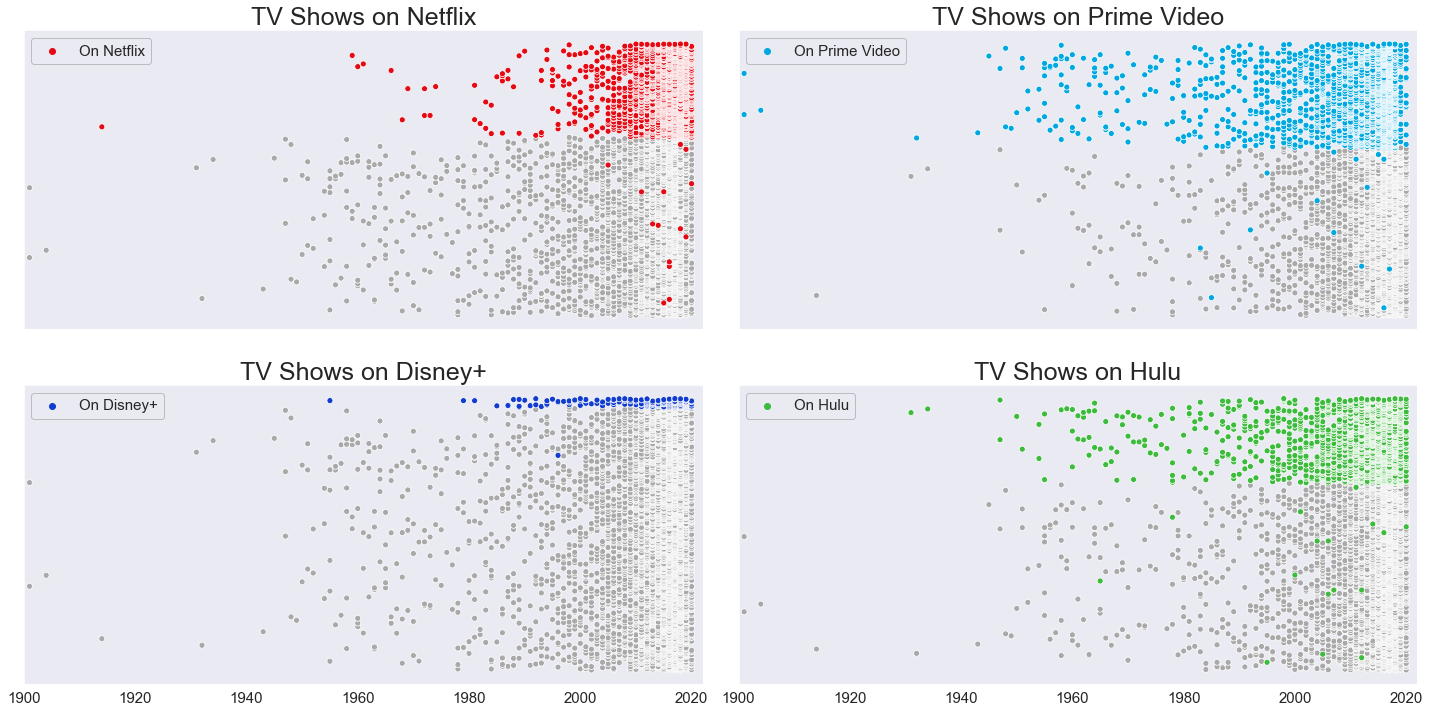

In [34]:
fig = plt.figure(figsize=[20,10])
sns.set_style('dark')

for col_name, num in zip(col_names_online_media, 
                         range(1,len(col_names_online_media) + 1)):
    ax = fig.add_subplot(2, 2, num)
    sns.scatterplot(x="Year", y="Title", 
                    palette = pallete_dict[col_name],
                    hue=col_name, 
                    data=df.sort_values(by=[col_name, 'Title']), 
                    ax=ax)
    sns.despine
    ax.set_title('TV Shows on ' + col_name, fontsize=25)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc='upper left', 
              frameon=None,
              edgecolor='black',
              fontsize=15,
              framealpha=0.2,
              handles=[handles[2]],
              labels=['On ' + col_name])
    ax.set_xlim(1900, 2022)
    ax.set(yticklabels=[])
    ax.set(ylabel=None, xlabel=None)
    
fig.tight_layout()

for ax in fig.get_axes():
    ax.label_outer()

plt.show()

#### Confused on the few coloured data-points among the greys?
If you confised about the grouping there, like I was, it is because of the duplicate names. So let's use the new labels of title - "Title Unique Labels"

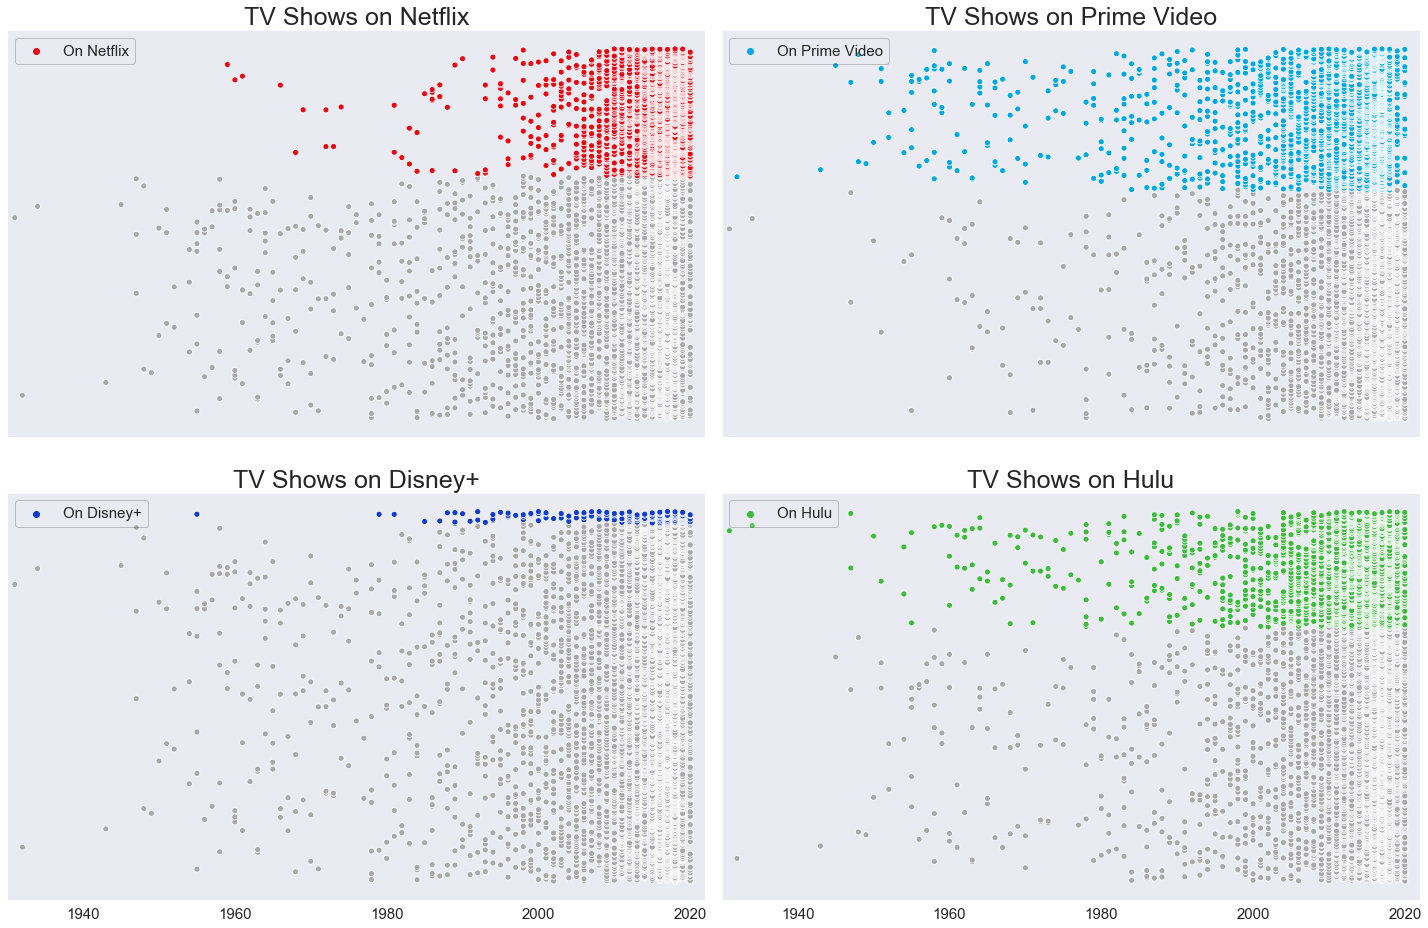

In [35]:
fig = plt.figure(figsize=[20,13])
sns.set_style('dark')

for col_name, num in zip(col_names_online_media, 
                         range(1,len(col_names_online_media) + 1)):
    ax = fig.add_subplot(2, 2, num)
    sns.scatterplot(x="Year", y="Title Unique Labels", 
                    palette = pallete_dict[col_name],
                    hue=col_name, 
                    data=df[df.Year > 1930].sort_values(by=[col_name, 
                                            'Title Unique Labels']), 
                    ax=ax)
    sns.despine
    ax.set_title('TV Shows on ' + col_name, fontsize=25)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(loc='upper left', 
              frameon=None,
              edgecolor='black',
              fontsize=15,
              framealpha=0.2,
              handles=[handles[2]],
              labels=['On ' + col_name])
    ax.set_xlim(1930, 2022)
    ax.set(yticklabels=[])
    ax.set(ylabel=None, xlabel=None)
    
fig.tight_layout()

for ax in fig.get_axes():
    ax.label_outer()
    
# fig.text(15,5, "Sample")
plt.savefig('demo1.png', transparent=True)
plt.show()

#### Number of TV Shows before 1990

In [74]:
for col_name in col_names_online_media:
    print(col_name)
    print(len(df[(df.Year > 1930) & (df.Year < 1990) & (df[col_name] == 1)]))

Netflix
28
Prime Video
159
Disney+
9
Hulu
110


In [76]:
159/28, 110/28

(5.678571428571429, 3.9285714285714284)

#### Looks nice. 

So let's move on to assuming 7+ age are all in Disney+. Let's make bar charts to see how age is distributed.

In [36]:
def reset_bar_width(ax, new_width):
    for patch in ax.patches:
        old_width = patch.get_width()
        # print(current_width)
        patch.set_width(new_width)
        shift = old_width - new_width
        patch.set_x(patch.get_x() + shift * .5)

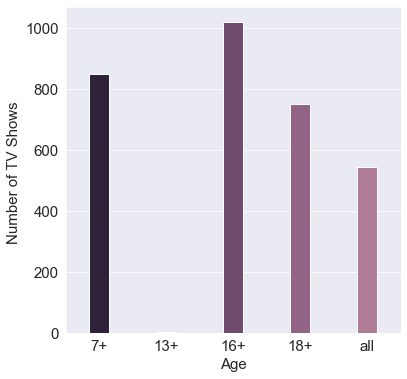

In [37]:
fig = plt.figure(figsize=[6,6])
sns.set_style('darkgrid')
ax = sns.countplot(x="Age", 
                   data=df, order=['7+', '13+', '16+', '18+', 'all'], 
                   palette=sns.cubehelix_palette(8, reverse=True))
reset_bar_width(ax, 0.3)
plt.ylabel("Number of TV Shows ")
plt.show()

The N/As are missing and so it is time to fill them up with a value - 'Not Available'

In [38]:
df.Age.fillna(value='N/A', inplace=True)

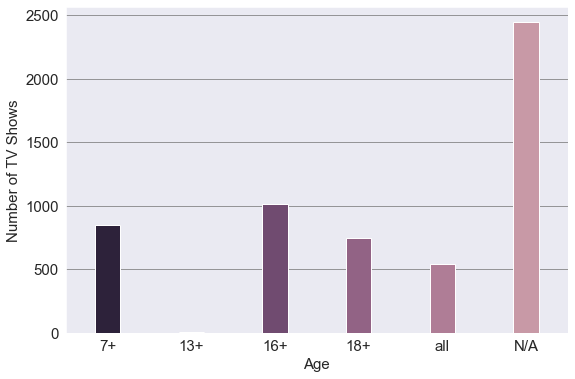

In [39]:
fig = plt.figure(figsize=[9,6])
sns.set_style('darkgrid')
ax = sns.countplot(x="Age", data=df,
                   order=['7+', '13+', '16+', '18+', 'all', 'N/A'], 
                   palette=sns.cubehelix_palette(8, reverse=True))
reset_bar_width(ax, 0.3)
plt.ylabel("Number of TV Shows")
plt.grid(True, color='grey', axis='y')
plt.savefig('demo2.png', transparent=True)

Around 44% of the data is unknown. The maximum number of movies are 16+. Only a few are 13+. Let's see if the 13+ movies are from before or after 2000s.

In [40]:
df[df.Age == '13+']

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,Title Cleaned,Title Cleaned Unique,Title Unique Labels
1116,Powder,1995,13+,6.6,50%,1,0,0,0,1,powder,powder 1995,Powder 1995
1123,Behind Enemy Lines,2001,13+,6.4,37%,1,0,0,0,1,behind enemy lines,behind enemy lines 2001,Behind Enemy Lines 2001
1514,The In-Laws,2003,13+,5.7,34%,1,0,0,0,1,the inlaws,the inlaws 2003,The In-Laws 2003
4024,Dark Knight,2000,13+,5.3,NaN,0,0,1,0,1,dark knight,dark knight 2000,Dark Knight 2000


They are around the early 2000s and 3/4 are on Netflix. Let's keep them as they are.

Now let's visualize a heatmap to see how Age vs the online streaming channels.

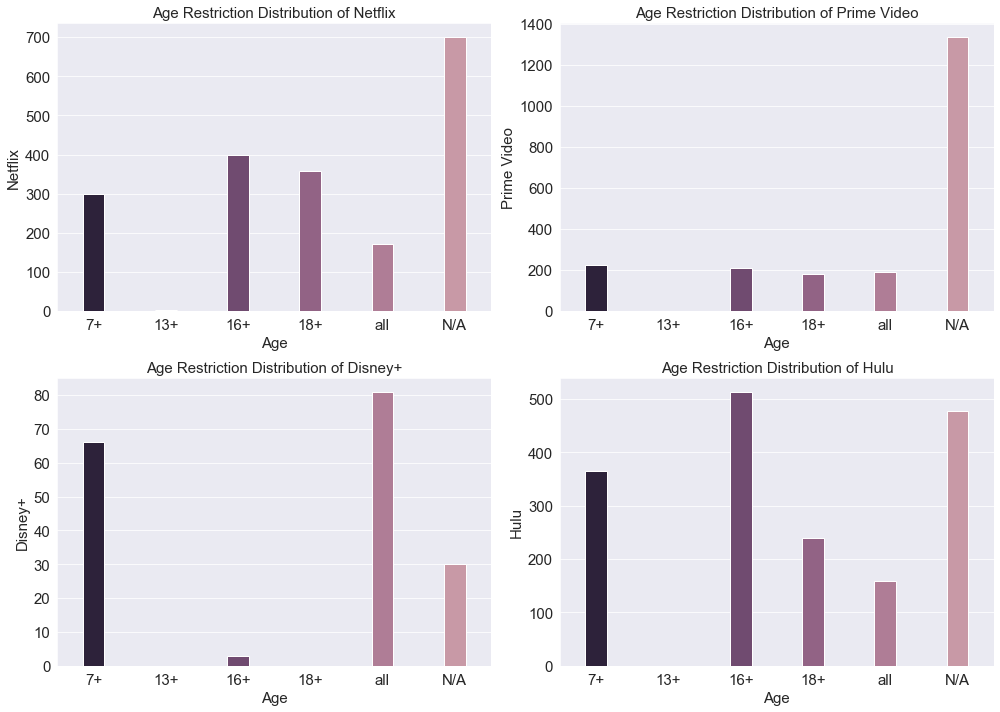

In [41]:
fig = plt.figure(figsize=[14,10])
sns.set_style('darkgrid')

for col_name, num in zip(col_names_online_media, 
                         range(1,len(col_names_online_media) + 1)):
    data = df[df[col_name] == 1].groupby(by='Age').count().reset_index()
    ax = fig.add_subplot(2, 2, num)
    sns.barplot(x="Age", 
                y=col_name, 
                data=data, 
                order=['7+', '13+', '16+', '18+', 'all', 'N/A'],
                palette=sns.cubehelix_palette(8, reverse=True))
    reset_bar_width(ax, 0.3)
    ax.set_title('Age Restriction Distribution of ' + col_name, fontsize=15)
    
fig.tight_layout()
plt.show()

Looks like it is difficult to distinguish without the limits of y axis standardised. One way of solving this is using percentages and trying to normalize. 

Either we do this -

#### Set Y axis limits

Clearly, if you draw a comparison to the set of bar charts above and the one below - the distributions' comparisons are much more evident, hasslefree and visible. In the previous set you might have to look at the distribution and check the Y-axis and compare with Y-axis of the adjacent graph. So - in short - this is neat.

I set the Y -axis upper limit as 1500. Initially I had used 2500 but then the bars were too low to distinguish. This trual and error can well be converted into a function of finding the maximum value in all these distributions and adding a 100 or 200 padding on top to make up the Y axis limits.

#### Also use color codes to represent each of the companies

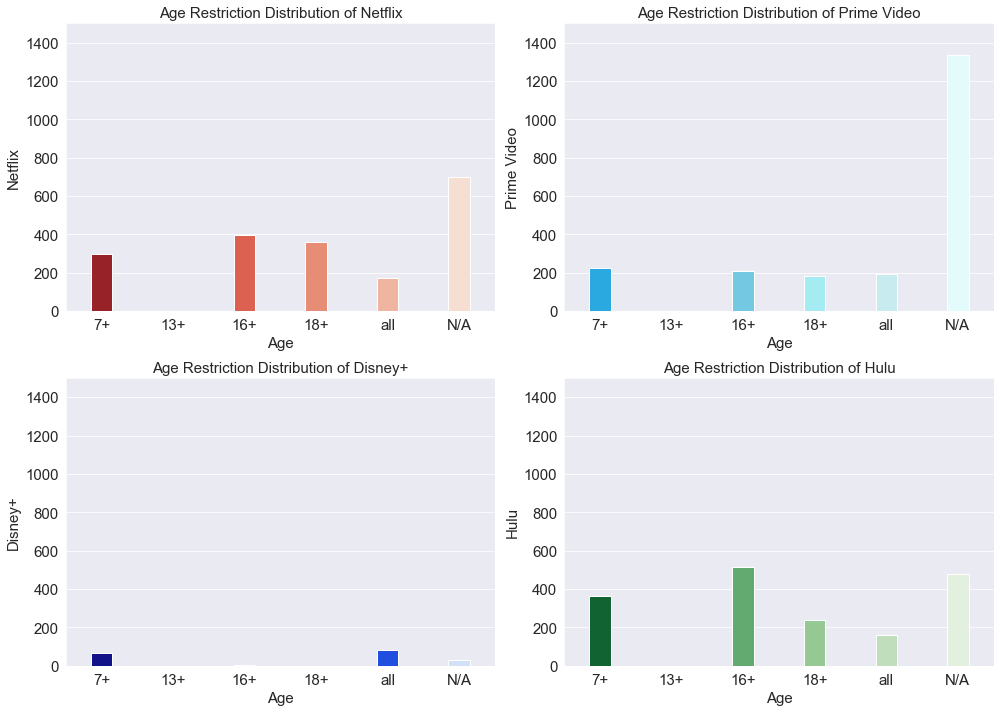

In [67]:
fig = plt.figure(figsize=[14,10])
sns.set_style('darkgrid')

palette_list=['Reds_r', 
              ['#0BB5FF', '#000000', '#63D1F4', '#98F5FF', '#C1F0F6', '#E0FFFF'], 
              ['#00009C', '#000000', '#000000', '#000000', '#003EFF', '#CAE1FF'], 
              'Greens_r' ]

for col_name, num in zip(col_names_online_media, 
                         range(1,len(col_names_online_media) + 1)):
    data = df[df[col_name] == 1].groupby(by='Age').count().reset_index()
    ax = fig.add_subplot(2, 2, num)
    sns.barplot(x="Age", 
                y=col_name, 
                data=data, 
                order=['7+', '13+', '16+', '18+', 'all', 'N/A'],
                palette=palette_list[num-1])
    ax.set_title('Age Restriction Distribution of ' + col_name, fontsize=15)
    reset_bar_width(ax, 0.3)
    ax.set_ylim(0, 1500)
    
fig.tight_layout()
plt.show()

#### The other way is to computer percentages after grouping -

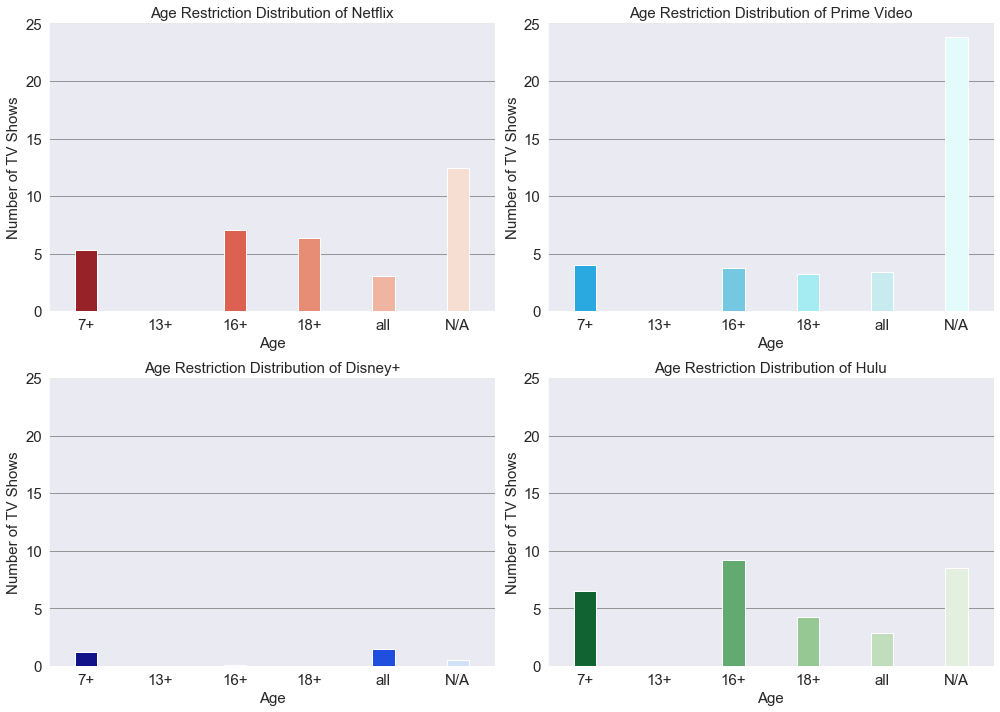

In [71]:
fig = plt.figure(figsize=[14,10])
sns.set_style('darkgrid')


palette_list=['Reds_r', 
              ['#0BB5FF', '#000000', '#63D1F4', '#98F5FF', '#C1F0F6', '#E0FFFF'], 
              ['#00009C', '#000000', '#000000', '#000000', '#003EFF', '#CAE1FF'], 
              'Greens_r' ]

for col_name, num in zip(col_names_online_media, 
                         range(1,len(col_names_online_media) + 1)):
    data = df[df[col_name] == 1].groupby(by='Age').count().reset_index()[['Age', col_name]]
    data[col_name] = data[col_name]*100/len(df)
    ax = fig.add_subplot(2, 2, num)
    sns.barplot(x="Age", 
                y=col_name, 
                data=data, 
                order=['7+', '13+', '16+', '18+', 'all', 'N/A'],
                palette=palette_list[num-1])
    reset_bar_width(ax, 0.3)
    ax.set_title('Age Restriction Distribution of ' + col_name, fontsize=15)
    ax.set_ylabel('Number of TV Shows')
    ax.set_ylim(0, 25)
    ax.grid(True, color='grey', axis='y')
    
fig.tight_layout()
plt.savefig('demo3.png', transparent=True)
plt.show()

The individual fractions are so less that I set the maximum y axis limit as 25. This looks similar to the one we had before - much easier to compare anf contrast.

So what do we get from here:
1. Looks like the rank of the distribution of these companies would be - Prime Video, Netflix, Hulu and Disney.
2. Also, from our earlier assumption that Disney+ might have the most number of 7+ and all videos was wrong. Although this statement is true - Among all shows on Disney+, most of them are for 7+ and 'all' ages.
3. I all the others , except for Diney+, 16+ and 18+ have higher percentage of 16+ and 18+ combined. I guess that is the target audience for these companies while for Disney+, the target audience is the younger ones (which is again intuitive and is proved here).

#### Comparing the Ratings on these sites -

1. We need to change Rotten Tomatoes column from string to int.
2. Use box plots now to check the distributions.

In [43]:
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].fillna('0%')
df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.replace('%', '')
df['Rotten Tomatoes'].value_counts()

0      4600
100     109
93       36
89       31
80       31
       ... 
21        1
26        1
14        1
23        1
18        1
Name: Rotten Tomatoes, Length: 89, dtype: int64

In [44]:
df['Rotten Tomatoes'].value_counts()

0      4600
100     109
93       36
89       31
80       31
       ... 
21        1
26        1
14        1
23        1
18        1
Name: Rotten Tomatoes, Length: 89, dtype: int64

In [45]:
list_df_frames = []
for num, each_online_media in enumerate(col_names_online_media):
    df_each_media = pd.DataFrame()
    df_each_media['Value'] = list(df[df[each_online_media]==1]['IMDb'])
    df_each_media['Variable'] = each_online_media
    list_df_frames.append(df_each_media)
df_box_plot_prep_imdb = pd.concat(list_df_frames)
df_box_plot_prep_imdb.head(5)

,Value,Variable
0,9.5,Netflix
1,8.8,Netflix
2,8.4,Netflix
3,9.1,Netflix
4,8.7,Netflix


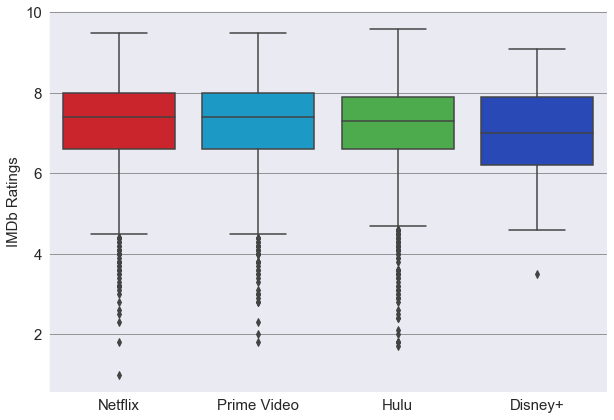

In [90]:
fig = plt.figure(figsize=[10,7])
sns.set_style('darkgrid')

palette_colour_from_dict = [v[1] for v in list(pallete_dict.values())]
sns.boxplot(x='Variable', 
            y='Value',
            palette=palette_colour_from_dict,
            order=list(pallete_dict.keys()),
            data=df_box_plot_prep_imdb)
# plt.xlabel('Online Streaming Media')
plt.xlabel(xlabel=None)
plt.ylabel('IMDb Ratings')
plt.grid(True, axis='y', color='grey')
plt.savefig('demo4.png', transparent=True)

In [47]:
df[df['Prime Video']==1]['IMDb'].median(), df[df['Prime Video']==1]['IMDb'].describe() 

(7.4, count    1307.000000
 mean        7.179801
 std         1.133510
 min         1.800000
 25%         6.600000
 50%         7.400000
 75%         8.000000
 max         9.500000
 Name: IMDb, dtype: float64)

In [48]:
df[df['Netflix']==1]['IMDb'].median(), df[df['Netflix']==1]['IMDb'].describe() 

(7.4, count    1811.000000
 mean        7.163280
 std         1.088338
 min         1.000000
 25%         6.600000
 50%         7.400000
 75%         8.000000
 max         9.500000
 Name: IMDb, dtype: float64)

In [49]:
df[df['Disney+']==1]['IMDb'].median(), df[df['Disney+']==1]['IMDb'].describe() 

(7.0, count    169.000000
 mean       6.923669
 std        1.077545
 min        3.500000
 25%        6.200000
 50%        7.000000
 75%        7.900000
 max        9.100000
 Name: IMDb, dtype: float64)

In [110]:
df[df['Hulu']==1]['IMDb'].median(), df[df['Hulu']==1]['IMDb'].describe() 

(7.3, count    1517.000000
 mean        7.061107
 std         1.192817
 min         1.700000
 25%         6.600000
 50%         7.300000
 75%         7.900000
 max         9.600000
 Name: IMDb, dtype: float64)

Text(0, 0.5, 'Rotten Tomatoes Ratings')

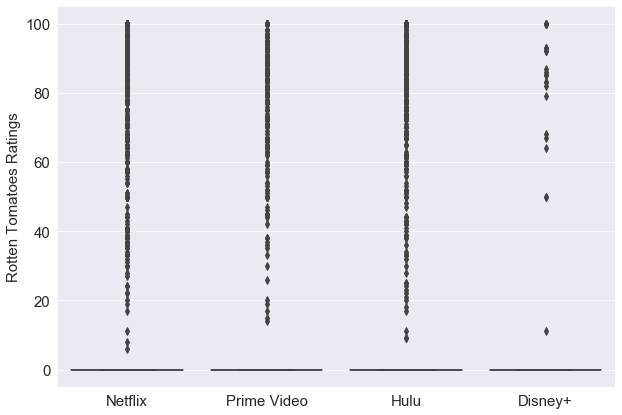

In [50]:
fig = plt.figure(figsize=[10,7])
sns.set_style('darkgrid')

list_df_frames = []
for num, each_online_media in enumerate(col_names_online_media):
    df_each_media = pd.DataFrame()
    df_each_media['Value'] = list(df[df[each_online_media]==1]['Rotten Tomatoes'].astype(int))
    df_each_media['Variable'] = each_online_media
    list_df_frames.append(df_each_media)
df_box_plot_prep_rt = pd.concat(list_df_frames)
df_box_plot_prep_rt.head(5)

palette_colour_from_dict = [v[1] for v in list(pallete_dict.values())]
sns.boxplot(x='Variable', 
            y='Value',
            palette=palette_colour_from_dict,
            order=list(pallete_dict.keys()),
            data=df_box_plot_prep_rt)
#plt.xlabel('Online Streaming Media')
plt.xlabel(xlabel=None)
plt.ylabel('Rotten Tomatoes Ratings')

In [51]:
df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Netflix'].describe()

,Value
count,1931.000000
mean,18.328845
std,34.621702
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


In [52]:
df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Prime Video'].describe()

,Value
count,2144.000000
mean,8.169310
std,24.521435
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


In [53]:
df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Disney+'].describe()

,Value
count,180.000000
mean,10.833333
std,28.714449
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,100.000000


This looks uncanny. Let's see the medians.

In [54]:
df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Disney+'].median(), df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Netflix'].median(), df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Prime Video'].median() 

(Value    0.0
 dtype: float64, Value    0.0
 dtype: float64, Value    0.0
 dtype: float64)

That's reason. This is because I replaced the ones which had nans into zero (if you can split the median lines at the bottom i.e. IQR is calculated as 0 => 1.5 * IQR = 0 ). So I'll filter those out and try again below:

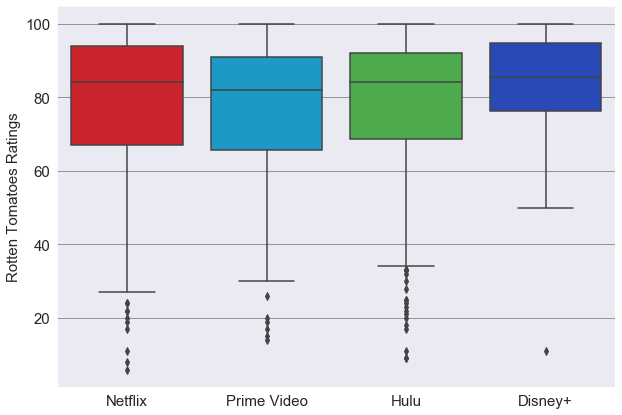

In [89]:
fig = plt.figure(figsize=[10,7])
sns.set_style('darkgrid')

list_df_frames = []
for num, each_online_media in enumerate(col_names_online_media):
    df_each_media = pd.DataFrame()
    df_each_media['Value'] = list(df[(df[each_online_media]==1) & (df['Rotten Tomatoes'] != '0')]['Rotten Tomatoes'].astype(int))
    df_each_media['Variable'] = each_online_media
    list_df_frames.append(df_each_media)
df_box_plot_prep_rt = pd.concat(list_df_frames)
df_box_plot_prep_rt.head(5)

palette_colour_from_dict = [v[1] for v in list(pallete_dict.values())]
sns.boxplot(x='Variable', 
            y='Value',
            palette=palette_colour_from_dict,
            order=list(pallete_dict.keys()),
            data=df_box_plot_prep_rt)
plt.xlabel(xlabel=None)
plt.ylabel('Rotten Tomatoes Ratings')
plt.grid(True, axis='y', color='grey')
plt.savefig('demo5.png', transparent=True)

In [56]:
df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Disney+'].median(), df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Disney+'].describe()

(Value    85.5
 dtype: float64,             Value
 count   24.000000
 mean    81.250000
 std     21.137747
 min     11.000000
 25%     76.250000
 50%     85.500000
 75%     94.750000
 max    100.000000)

In [57]:
df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Netflix'].median(), df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Netflix'].describe()

(Value    84.0
 dtype: float64,             Value
 count  454.000000
 mean    77.958150
 std     21.166751
 min      6.000000
 25%     67.000000
 50%     84.000000
 75%     94.000000
 max    100.000000)

In [58]:
df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Prime Video'].median(), df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Prime Video'].describe()

(Value    82.0
 dtype: float64,             Value
 count  228.000000
 mean    76.820175
 std     19.483148
 min     14.000000
 25%     65.750000
 50%     82.000000
 75%     91.000000
 max    100.000000)

In [109]:
df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Hulu'].median(), df_box_plot_prep_rt[df_box_plot_prep_rt.Variable == 'Hulu'].describe()

(Value    84.0
 dtype: float64,             Value
 count  375.000000
 mean    78.042667
 std     19.951232
 min      9.000000
 25%     68.500000
 50%     84.000000
 75%     92.000000
 max    100.000000)

#### Percentage of Online Streaming sites having TV shows with below 5 pts according to IMDb Ratings

In [59]:
count_imdb_list = []
for each_online_media in col_names_online_media:
    count = len(df[(df[each_online_media]==1) & (df['IMDb'] < 5)]['IMDb']) * 100 / len(df[(df[each_online_media]==1)])
    print("{}:{:.2f}%".format(each_online_media, count))
    count_imdb_list.append(count)

Netflix:3.68%
Prime Video:2.71%
Disney+:4.44%
Hulu:5.53%


#### Percentage of Prime Videos below 50% according to Rotten Tomatoes Ratings

In [60]:
count_rt_list = []
for each_online_media in col_names_online_media:
    count = len(df_box_plot_prep_rt[(df_box_plot_prep_rt.Variable == each_online_media) 
                                    & (df_box_plot_prep_rt.Value < 50)]) * 100/ len(df_box_plot_prep_rt[(df_box_plot_prep_rt.Variable == each_online_media)]) 
    print("{}:{:.2f}%".format(each_online_media, count))
    count_rt_list.append(count)

Netflix:11.67%
Prime Video:8.77%
Disney+:4.17%
Hulu:10.40%


#### Average

In [61]:
for i,j, k in zip(count_imdb_list, count_rt_list, col_names_online_media):
    print("{}:{}".format(k,(i+j)/2))

Netflix:7.675430091459311
Prime Video:5.738576852579209
Disney+:4.305555555555555
Hulu:7.9651083238312435


#### Total number of TV Shows on each of these online streaming websites:

In [87]:
counts_list = []
for each_online_media in list(pallete_dict.keys()):
    count = len(df[df[each_online_media] == 1])
    counts_list.append(count)
    print("{}:{}".format(each_online_media, count))
    print("{}:{:.2f}".format(each_online_media, count*100/len(df)))

Netflix:1931
Netflix:34.41
Prime Video:2144
Prime Video:38.21
Hulu:1754
Hulu:31.26
Disney+:180
Disney+:3.21


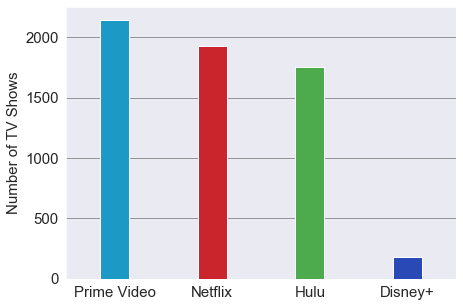

In [95]:
fig = plt.figure(figsize=[7,5])
sns.set_style('darkgrid')

# fig.text(.8, .9, "test")
ax = sns.barplot(y=counts_list, x=list(pallete_dict.keys()), 
                 palette= ['#00A8E1', '#E50914', '#3DBB3D', '#113CCF'], 
                 order=['Prime Video', 'Netflix', 'Hulu', 'Disney+'] )
reset_bar_width(ax, 0.3)
plt.ylabel('Number of TV Shows')
plt.grid(True, axis='y', color='grey')
plt.savefig('demo6.png', transparent=True)

In [111]:
df.groupby(by='Age').count().reset_index()[['Age','Title']]

,Age,Title
0,13+,4
1,16+,1018
2,18+,750
3,7+,848
4,N/A,2446
5,all,545


In [114]:
# Percentage shows has a cut-off for 16+ and 18+
(750)*100 / (5611 - 2446)

23.696682464454977

In [108]:
df.groupby(by='Age').count().reset_index()[['Age','Title']]['Title']*100/5611

0     0.071289
1    18.142934
2    13.366601
3    15.113171
4    43.592942
5     9.713064
Name: Title, dtype: float64

In [117]:
(100 * len(df[df.Year > 1999]))/ len(df) , (100 * len(df[df.Year > 2009]))/ len(df)

(90.46515772589557, 75.67278559971484)

#### We have three unbelievable data-points which are below 1930. We will not include them in our calculations about Year.

In [123]:
len(df[(df.Year < 1930)])

4

In [126]:
df[(df.Year < 1940)]

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type,Title Cleaned,Title Cleaned Unique,Title Unique Labels,Title Tokens
1854,Born To Explore,1914,N/A,NaN,0,1,0,0,0,1,born to explore,born to explore 1914,Born To Explore 1914,"[born, to, explore]"
2446,The Three Stooges,1934,all,8.6,0,0,1,0,0,1,the three stooges,the three stooges 1934,The Three Stooges 1934,"[the, three, stooges]"
3328,The Little Rascals Classics,1931,N/A,NaN,0,0,1,0,0,1,the little rascals classics,the little rascals classics 1931,The Little Rascals Classics 1931,"[the, little, rascals, classics]"
4652,Space: The New Frontier,1901,N/A,NaN,0,0,0,1,0,1,space the new frontier,space the new frontier 1901,Space: The New Frontier 1901,"[space, the, new, frontier]"
4679,Gods & Monsters with Tony Robinson,1901,N/A,NaN,0,0,0,1,0,1,gods monsters with tony robinson,gods monsters with tony robinson 1901,Gods & Monsters with Tony Robinson 1901,"[gods, monsters, with, tony, robinson]"
4701,History of Westinghouse,1904,N/A,NaN,0,0,0,1,0,1,history of westinghouse,history of westinghouse 1904,History of Westinghouse 1904,"[history, of, westinghouse]"
4711,Betty Boop,1932,all,NaN,0,0,0,1,0,1,betty boop,betty boop 1932,Betty Boop 1932,"[betty, boop]"


In [124]:
(100 * len(df[df.Year < 1999]))/ len(df) , (100 * (len(df[df.Year < 1950]) - 4))/ len(df)

(8.78631260024951, 0.19604348600962396)

#### Percentage of Netflix below 50% according to Rotten Tomatoes Ratings

Some Observations (based solely on the dataset):

* The total number of TV shows is much lower than the other online streaming websites. Given that they are comparatively new. 

* For Disney+, we see out of 180 enlisted TV shows, only 4.3% belongs to the lower half of the respective rating scales. Besides, there is only one outlier for both IMDb and RT, the median being 7 and  85% respectively. Their maximum content is directed towards 7+ and all audience types. They look more consistent that other. 

* Netflix and Prime Video has similar distributions with a good amount of TV shows below 5 on IMDb and 50% on Rotten Tomatoes ratings. Precisely, Netflix has an average count of 7% and Prime Video of 5% out of respective 1931 and 2144 lying in the lower half of the ratings scales.

* Huli is good and almost catching up with Netflix and Prime Video but just not as good. Hulu also has 7% shows in the lower half of the rating scales.

## Text Analysis of the Names on the TV Shows

My Prediction here is - Love and life are two words which are going to be among the top five in the wordcloud of 100 words.

In [83]:
import nltk
# nltk.download('punkt')
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import PIL.ImageOps
from wordcloud import ImageColorGenerator

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nroy0\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [84]:
df['Title Tokens'] = df['Title Cleaned'].apply(lambda x: word_tokenize(x))

In [85]:
df['Title Tokens']

0                          [breaking, bad]
1                       [stranger, things]
2                           [money, heist]
3                               [sherlock]
4                     [better, call, saul]
                       ...                
5606    [tuts, treasures, hidden, secrets]
5607                   [paradise, islands]
5608                        [wild, russia]
5609                          [love, vets]
5610         [united, states, of, animals]
Name: Title Tokens, Length: 5611, dtype: object

In [86]:
token_list = [str(each_token) for each_list in list(df['Title Tokens']) for each_token in each_list]
len(token_list)

16086

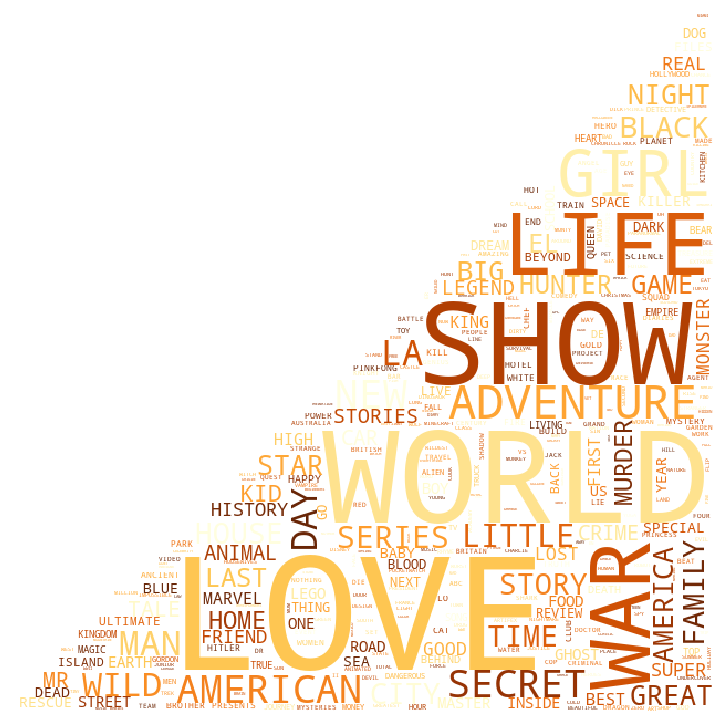

In [112]:
# mask_image = 'blue_circle.png'
mask_image = 'ert.jpg'
image_mask = np.array(Image.open(mask_image))
image_colors = ImageColorGenerator(image_mask)
    
wordcloud = WordCloud(width = 2000, height = 1200, max_words = 500, normalize_plurals = True, colormap='YlOrBr', 
                      mask=image_mask,
                      background_color = 'white', font_step = 1, relative_scaling = 0.8,
                      collocations = False, include_numbers = False).generate(' '.join([each_token.upper() for each_token in token_list]))                  
plt.figure(figsize = (20,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('demo7.png', transparent=True)
plt.show()

In [91]:
wordcloud.words_

{'love': 1.0,
 'world': 0.7647058823529411,
 'show': 0.6666666666666666,
 'life': 0.6274509803921569,
 'war': 0.5882352941176471,
 'girl': 0.5294117647058824,
 'adventure': 0.5098039215686274,
 'new': 0.4215686274509804,
 'american': 0.4117647058823529,
 'secret': 0.4117647058823529,
 'day': 0.37254901960784315,
 'la': 0.37254901960784315,
 'man': 0.3627450980392157,
 'wild': 0.35294117647058826,
 'little': 0.3431372549019608,
 'series': 0.3333333333333333,
 'black': 0.3137254901960784,
 'family': 0.3137254901960784,
 'time': 0.3137254901960784,
 'house': 0.30392156862745096,
 'story': 0.30392156862745096,
 'city': 0.30392156862745096,
 'star': 0.29411764705882354,
 'night': 0.29411764705882354,
 'great': 0.29411764705882354,
 'america': 0.29411764705882354,
 'last': 0.28431372549019607,
 'big': 0.28431372549019607,
 'el': 0.28431372549019607,
 'game': 0.28431372549019607,
 'hunter': 0.27450980392156865,
 'murder': 0.2647058823529412,
 'home': 0.2647058823529412,
 'kid': 0.254901960784

In [100]:
all_words_list = list(wordcloud.words_.keys())

In [102]:
word_freq_dict = {}
for each_word in all_words_list:
    count = token_list.count(each_word)
    word_freq_dict[each_word] = count
word_freq_dict = dict(sorted(word_freq_dict.items(), key=lambda kv: kv[1], reverse=True)[:10])
word_freq_dict

{'love': 101,
 'show': 67,
 'world': 63,
 'life': 62,
 'american': 40,
 'wild': 36,
 'war': 35,
 'man': 35,
 'little': 35,
 'new': 34}

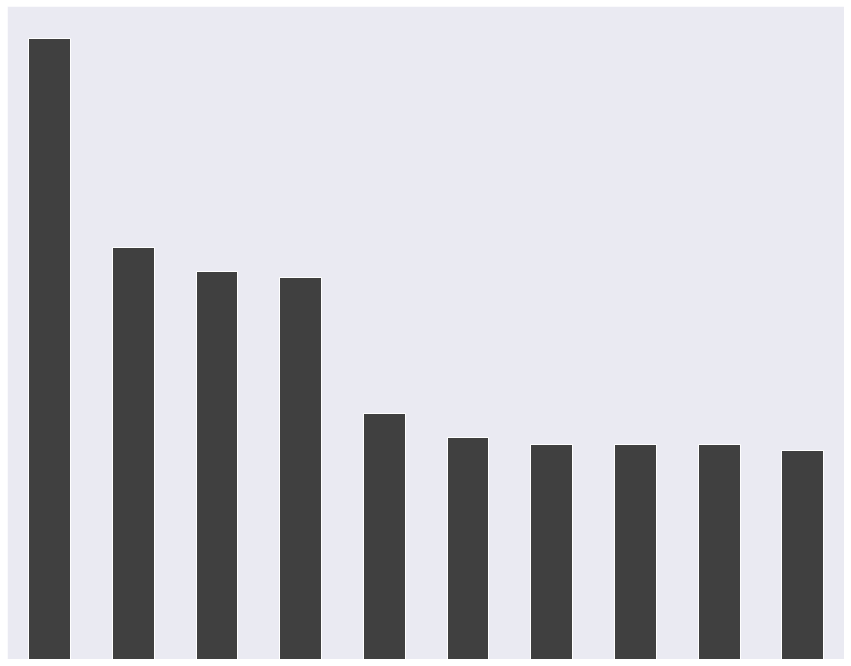

In [103]:
fig = plt.figure(figsize=[15,12])
sns.set_style('dark')

ax = sns.barplot(x=[word.upper() for word in word_freq_dict.keys()], y=list(word_freq_dict.values()),
            palette = ['#404040'] * 10
           )
plt.xticks([])
plt.yticks([])
reset_bar_width(ax, 0.5)
plt.savefig('demo8.png', transparent=True)